# Problem Statement

Here, we are predicting the deaths in the US due to COVID 19 till 21/05/2020 with the help of various factors available in this data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df=pd.read_csv("COVID_19.csv")
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
df.shape

(58, 18)

In [4]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [5]:
df['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [6]:
df.Province_State.value_counts()

Louisiana                   1
Alaska                      1
Northern Mariana Islands    1
Pennsylvania                1
West Virginia               1
North Dakota                1
Arkansas                    1
Tennessee                   1
Kansas                      1
Connecticut                 1
Kentucky                    1
New York                    1
Grand Princess              1
Ohio                        1
Nebraska                    1
Delaware                    1
Idaho                       1
Utah                        1
Virgin Islands              1
South Carolina              1
North Carolina              1
Nevada                      1
Missouri                    1
Oregon                      1
New Mexico                  1
Maine                       1
Wisconsin                   1
Guam                        1
Rhode Island                1
Minnesota                   1
Mississippi                 1
New Hampshire               1
Wyoming                     1
American S

'Province_State' has all the data unique which cant be useful for our analysis, hence will drop this column.

In [7]:
df['Country_Region'].unique()

array(['US'], dtype=object)

It has only 1 unique value and hence it cant be much use for analysis.

In [8]:
df['ISO3'].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

It has 6 unique values which can be useful for our analysis hence will be encoding the data in it.

In [9]:
df['Last_Update'].unique()

array(['2020-05-21 02:32:54'], dtype=object)

It has only 1 unique value and hence it cant be much use for analysis.

In [10]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

From above also it is ascertained that Province_State, Country_Region, Last_Update & ISO3 has categorical/object dtype wile other columns has int/float dtype.

In [11]:
#Dropping non-relevant and object dtype columns

df.drop(['Province_State','Country_Region','Last_Update' ], axis=1, inplace=True)

In [12]:
df.head()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [13]:
df.shape

(58, 15)

In [14]:
df.isnull().sum()

Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Found Nan values on columns- Lat, Long_, Recovered, Incident_Rate, People_Tested, People_Hospitalized,Mortality_Rate, Testing_Rate, Hospitalization_Rate  will be filling the Nan values with mean.

In [15]:
for col in ['Lat', 'Long_','Recovered', 'Incident_Rate','People_Tested', 'People_Hospitalized', 'Mortality_Rate','Testing_Rate', 'Hospitalization_Rate']:
    df[col].fillna(df[col].mean(), inplace=True)

In [16]:
df.isnull().values.any()

False

Null values has been removed

In [17]:
#Changing categorical datatype column which is 'ISO3' for visualization

import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['ISO3']=le.fit_transform(df['ISO3'])

In [18]:
df['ISO3'].unique()

array([4, 0, 1, 2, 3, 5])

Here, 0=ASM, 1=GUM, 2=MNP, 3=PRI, 4=USA, 5=VIR

In [19]:
df

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,32.318200,-86.902300,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,4,5063.940017,14.342541
2,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,4.458248,16,0,222.857246,14.342541
3,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,4,3189.670370,10.693584
5,36.116200,-119.681600,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,4,3492.893832,14.342541
6,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,4,2289.339188,17.348774
7,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,4,5349.302875,28.054438
8,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,4,4663.552976,14.342541
9,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,0.000000,84088888,4,3894.186870,14.342541


In [20]:
#Checking Skewness

In [21]:
df.skew()

Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

There are lots of skewness present in the data, will have to treat the same.

Here, we rae keeping the threshold value as +/- 2 for skewness

# Statistical Summary

In [22]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3.844828,3894.186870,14.342541
std,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,0.720665,1898.951207,3.781861
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,0.000000,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,4.000000,2741.843521,12.829963
50%,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,4.000000,3501.526835,14.342541
75%,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4.000000,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,5.000000,11377.424693,28.054438


Key observation:
    1. mean is greater than median almost in all the columns, hence the data has skewness.
    2. since the difference between 75% and max values are huge in most of the columns, there could be outliers also present in the data.

# Visualization

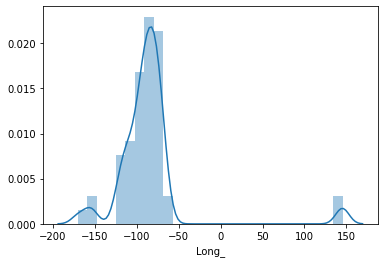

In [23]:
#Univariate Analysis
sns.distplot(df['Long_'])

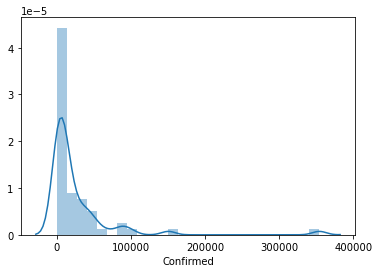

In [24]:
sns.distplot(df['Confirmed'])

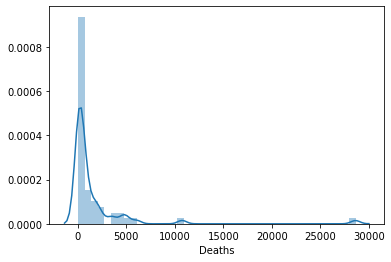

In [25]:
sns.distplot(df['Deaths'])

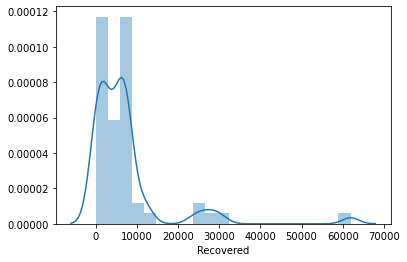

In [26]:
sns.distplot(df['Recovered'])

In [27]:
collist=df.columns.values
ncol=10
nrows=10

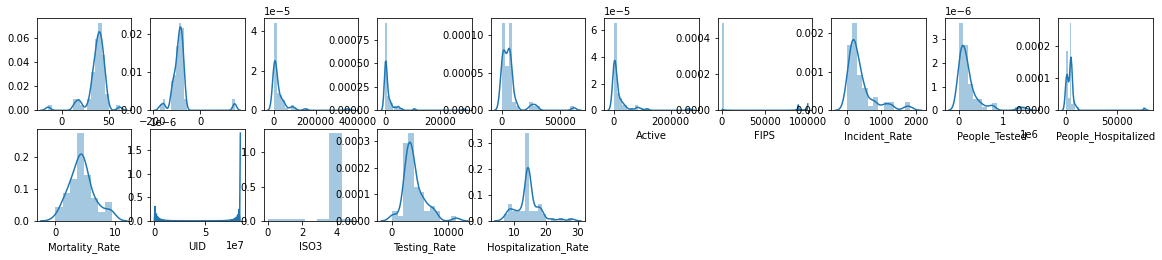

In [28]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

From above, it can be observed that the data is not normally distributed which needs to be treated.

In [29]:
#Checking correlation with bivariate analysis

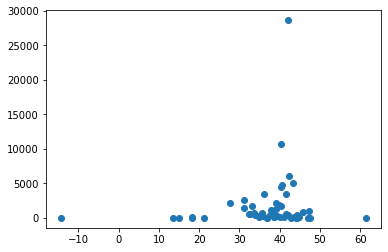

In [30]:
plt.scatter(df['Lat'],df['Deaths'])

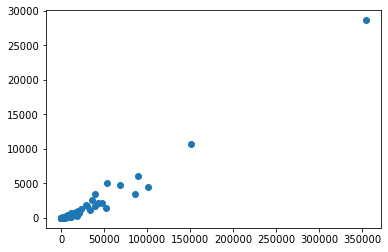

In [31]:
plt.scatter(df['Confirmed'],df['Deaths'])

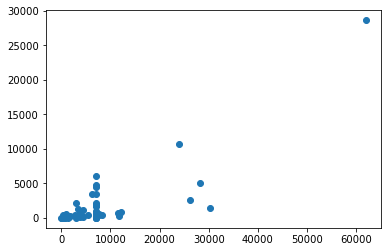

In [32]:
plt.scatter(df['Recovered'],df['Deaths'])

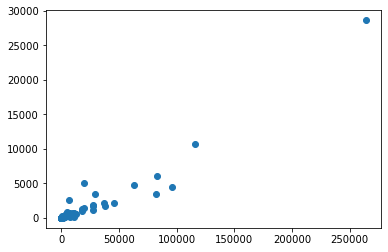

In [33]:
plt.scatter(df['Active'],df['Deaths'])

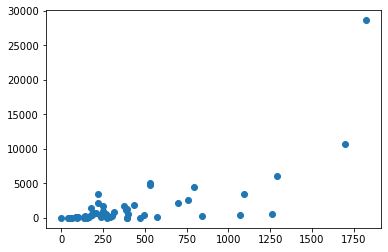

In [34]:
plt.scatter(df['Incident_Rate'],df['Deaths'])

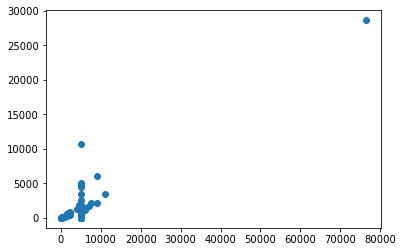

In [35]:
plt.scatter(df['People_Hospitalized'],df['Deaths'])

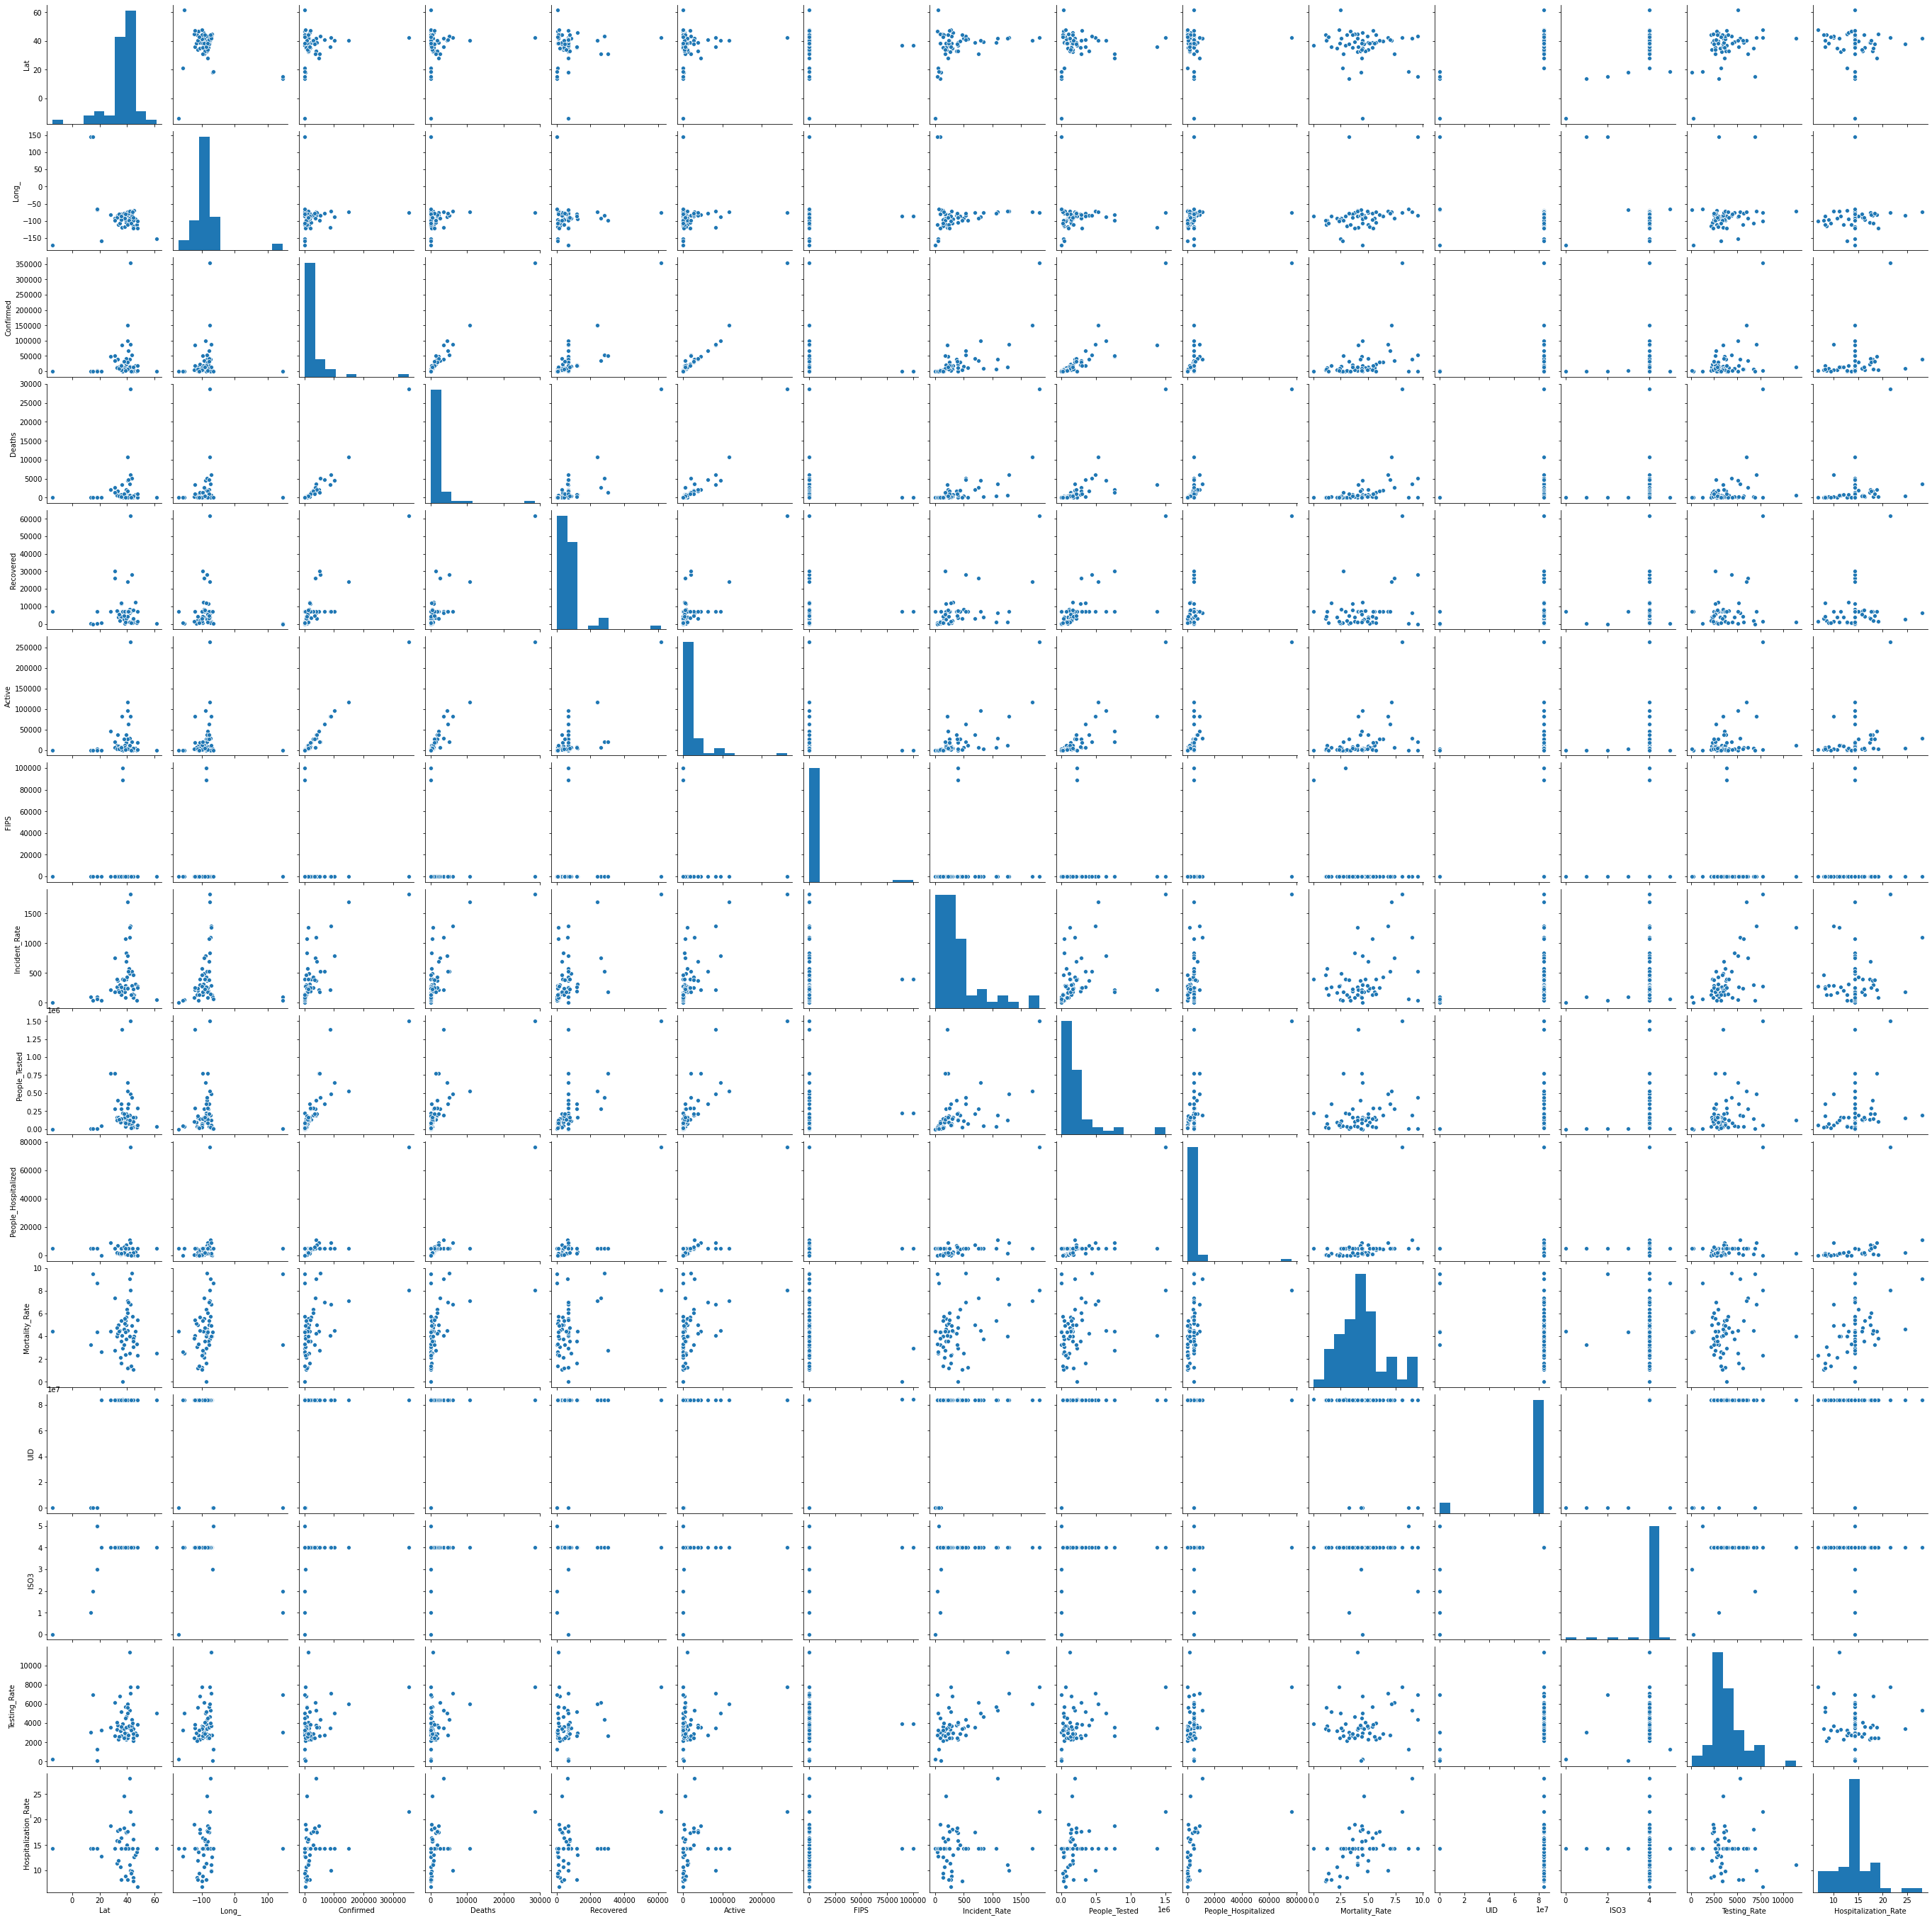

In [36]:
sns.pairplot(df)

In [37]:
df.columns

Index(['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

In [40]:
#Multivariate Analysis

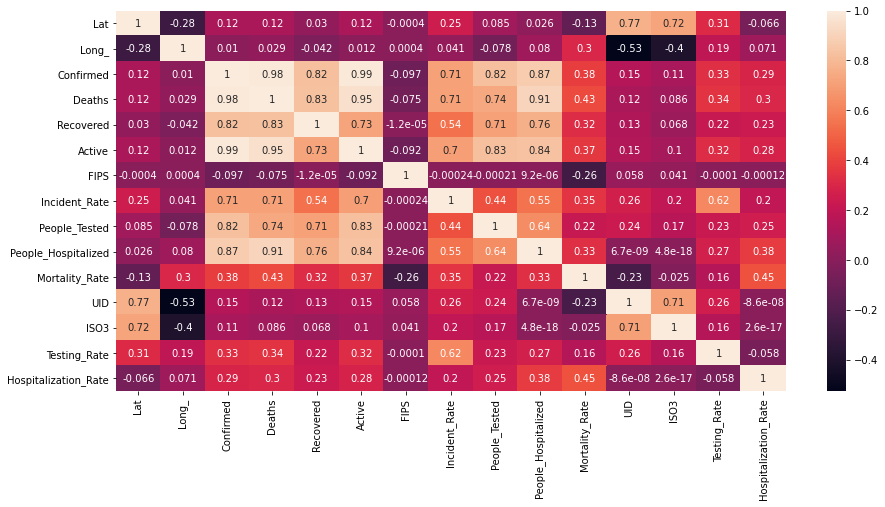

In [38]:
#Chevking Correlation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

Observations:
    1. Target 'Deaths' has strong positive correlation with 'Confirmed'-0.98, with 'Active'-0.95, with 'People_Hospitalized'-0.91
    2. Variables like ISO3, FIPS has weak correlation with target variable
    3. Since we have already dropped few columns, will only drop FIPS column which has very imbalanced data in it.

In [41]:
df.drop(['FIPS' ], axis=1, inplace=True)

In [42]:
df.shape

(58, 14)

In [43]:
#Univariate analysis

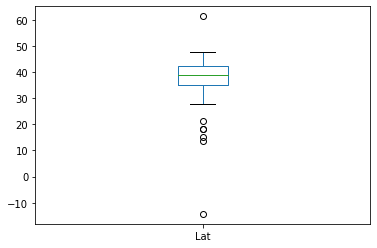

In [44]:
#Checking and handling Outliers
df['Lat'].plot.box()

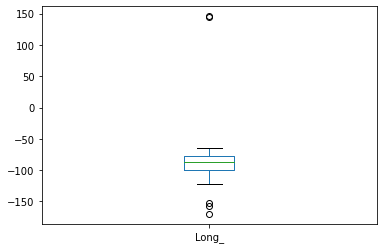

In [45]:
df['Long_'].plot.box()

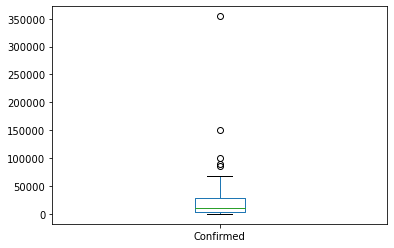

In [47]:
df['Confirmed'].plot.box()

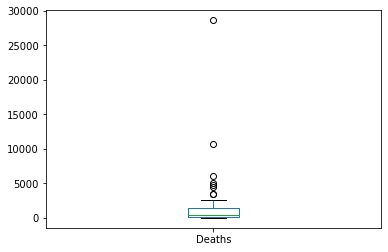

In [48]:
df['Deaths'].plot.box()

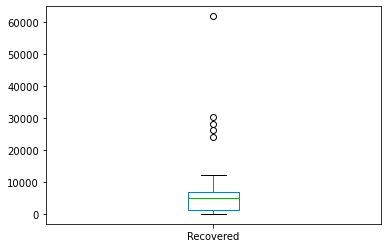

In [49]:
df['Recovered'].plot.box()

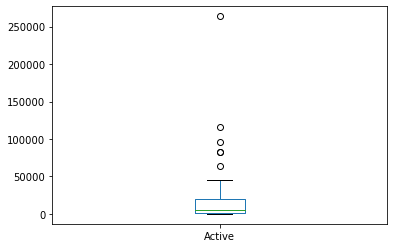

In [50]:
df['Active'].plot.box()

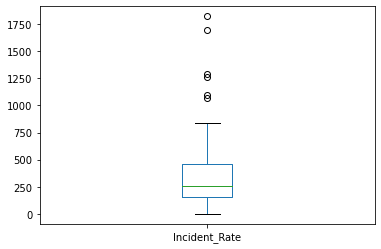

In [51]:
df['Incident_Rate'].plot.box()

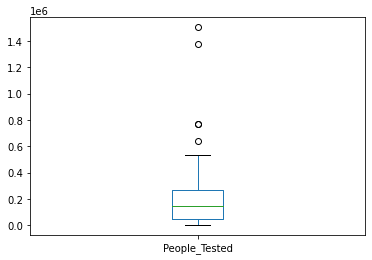

In [52]:
df['People_Tested'].plot.box()

Index(['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

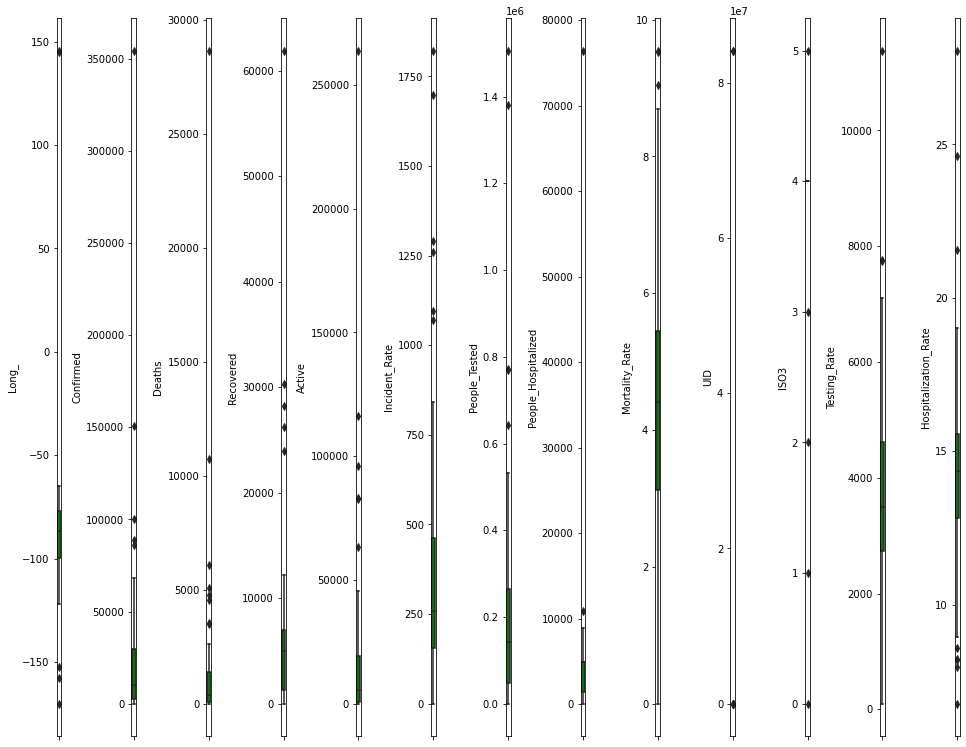

In [61]:
collist=df.columns.values
ncol=17
nrows=10

plt.figure(figsize=(ncol,6*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]], color='green', orient='v')
    plt.tight_layout()

It can be observed from above visualization, there are lots of outliers present almost in all the variables.

In [62]:
#removing outliers using zscore method

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z


array([[4.26523477e-01, 3.49982309e-02, 2.62999251e-01, 2.68934023e-01,
        0.00000000e+00, 1.84202386e-01, 3.31615693e-01, 2.11041917e-01,
        3.47604767e-01, 2.18727182e-01, 3.06995177e-01, 2.17198770e-01,
        2.86980973e-01, 7.74497410e-01],
       [2.31382962e+00, 1.38693367e+00, 5.05788407e-01, 3.95372994e-01,
        6.78047590e-01, 4.89328519e-01, 8.70668532e-01, 6.48929571e-01,
        0.00000000e+00, 9.36418161e-01, 3.06995220e-01, 2.17198770e-01,
        6.21379592e-01, 4.73806709e-16],
       [4.82101134e+00, 1.75282379e+00, 5.13484119e-01, 3.97842505e-01,
        0.00000000e+00, 4.90281199e-01, 1.01045759e+00, 7.75826083e-01,
        0.00000000e+00, 4.23371775e-16, 3.25578286e+00, 5.38170286e+00,
        1.95023139e+00, 4.73806709e-16],
       [2.93375472e-01, 5.41264279e-01, 2.27418578e-01, 2.13370022e-01,
        3.29519951e-01, 2.36575329e-01, 4.88210372e-01, 2.07656498e-01,
        3.17075993e-01, 2.63675605e-01, 3.06995304e-01, 2.17198770e-01,
        8.612

In [63]:
threshold=3
new_df=df[(z<3).all(axis=1)]

In [64]:
df.shape

(58, 14)

In [65]:
new_df.shape

(48, 14)

In [66]:
Percentage_loss=((58-48)/58)*100
Percentage_loss

17.24137931034483

In [67]:
#first, we are defining the x & y
x=new_df.drop('Deaths',axis=1)
y=new_df['Deaths']

In [69]:
x

,Lat,Long_,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,32.318200,-86.902300,13052,7007.428571,12530.0,266.194321,164450.000000,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,61.370700,-152.404400,401,352.000000,39.0,54.815493,37045.000000,4897.454545,2.493766,84000002,4,5063.940017,14.342541
3,33.729800,-111.431200,14906,3773.000000,10386.0,204.788838,165435.000000,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,34.969700,-92.373100,5003,3852.000000,1044.0,165.782801,96258.000000,535.000000,2.138717,84000005,4,3189.670370,10.693584
6,39.059800,-105.311100,22797,3478.000000,18020.0,395.868121,131837.000000,3955.000000,5.698118,84000008,4,2289.339188,17.348774
8,39.318500,-75.507100,8194,3965.000000,3919.0,841.476990,45412.000000,4897.454545,3.783256,84000010,4,4663.552976,14.342541
9,36.840089,-85.206614,49,7007.428571,49.0,396.230806,225853.410714,4897.454545,0.000000,84088888,4,3894.186870,14.342541
10,38.897400,-77.026800,7551,1059.000000,6085.0,1069.927127,40419.000000,4897.454545,5.390015,84000011,4,5727.106946,14.342541
11,27.766300,-81.686800,47471,7007.428571,45375.0,221.024217,771348.000000,8934.000000,4.415327,84000012,4,3591.383953,18.819911
12,33.040600,-83.643100,39801,7007.428571,38104.0,374.864974,402940.000000,7107.000000,4.263712,84000013,4,3795.082856,17.856335


In [70]:
y

0      522
1       10
3      747
4      107
6     1299
8      310
9        0
10     407
11    2096
12    1697
13       3
15      17
16      77
17    4525
18    1864
19     393
20     202
21     376
22    2608
23      73
24    2123
25    6066
26    5060
27     786
28     570
29     640
30      16
31     138
32     377
33     190
35     283
37     726
38      49
40    1781
41     299
42     144
43    4770
46     407
47      46
48     305
49    1426
50      90
51      54
53    1075
54    1037
55      69
56     481
57      11
Name: Deaths, dtype: int64

In [74]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [77]:
new_df.skew()

Lat                     0.328795
Long_                  -1.518734
Confirmed               1.951730
Deaths                  2.235443
Recovered               2.412085
Active                  2.486791
Incident_Rate           1.709873
People_Tested           1.778717
People_Hospitalized     0.247090
Mortality_Rate          0.266314
UID                     4.764465
ISO3                    0.000000
Testing_Rate            1.292268
Hospitalization_Rate    0.152571
dtype: float64

In [78]:
#scaling

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [81]:
#Finding best Random_state

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [85]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= .25, random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100}found on random_state{best_rstate}")

Best accuracy 83.53397075153308found on random_state69


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= .25, random_state=69)

# Model Building

In [93]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

r2score=r2_score(y_test,y_pred)

print(f"Accuracy={r2score*100}")

Accuracy=83.53397075153308


In [94]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)

r2score=r2_score(y_test,y_pred)

print(f"Accuracy={r2score*100}")

Accuracy=82.83793533963605


In [95]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

r2score=r2_score(y_test,y_pred)

print(f"Accuracy={r2score*100}")

Accuracy=77.83589559556565


In [96]:
from sklearn.ensemble import AdaBoostRegressor
ADB=RandomForestRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)

r2score=r2_score(y_test,y_pred)

print(f"Accuracy={r2score*100}")

Accuracy=82.18849010175647


It can be clearly observed that LinearRegression Model is performing the best with 83.53 accuracy. Hence will save this model.

# Model Saving

In [97]:
import pickle
filename= 'US_Covid19_deaths.pkl'
pickle.dump(LR, open(filename, 'wb'))

# Conclusion

In [98]:
import numpy as np
a=np.array(y_test)
predicted=np.array(LR.predict(x_test))

df_con2=pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_con2

,original,predicted
0,1299,1529.582534
1,1426,2003.487153
2,3,284.712466
3,73,-198.649136
4,2096,2032.270836
5,10,-239.372943
6,2608,3407.332848
7,90,489.398679
8,726,1424.649608
9,54,719.097316
